## Getting Started

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
df_train = pd.read_excel('Final_Train.xlsx', usecols=[0,1,2,3,4,6])# Not making use of all the columns
df_test = pd.read_excel('Final_Test.xlsx', usecols=[0,1,2,3,4,6])

In [37]:
df_train['Place'].fillna('NoLocality,NoCity',inplace = True)
df_test['Place'].fillna('NoLocality,NoCity',inplace = True)


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
Qualification    5961 non-null object
Experience       5961 non-null object
Rating           2659 non-null object
Place            5961 non-null object
Profile          5961 non-null object
Fees             5961 non-null int64
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
Qualification    1987 non-null object
Experience       1987 non-null object
Rating           897 non-null object
Place            1987 non-null object
Profile          1987 non-null object
dtypes: object(5)
memory usage: 77.7+ KB


In [40]:
fees_train = df_train.Fees

In [41]:
data = pd.concat([df_train.drop(['Fees'], axis=1), df_test])
data['Experience'] = data['Experience'].map(lambda x: x.rstrip(' years experience')).astype(int)
new = data["Place"].str.split(",", n = 1, expand = True) 
data["Locality"]=new[0]
data["City"]=new[1]
data['Profile'] = data['Profile'].str.strip()
data['Locality'] = data['Locality'].str.strip()
data['City'] = data['City'].str.strip()
data["City"].fillna("NoCity", inplace = True)
data = data.drop(['Place'], axis = 1)

In [42]:
data['Rating'].fillna('0%',inplace=True)

In [43]:
data['Rating'] = data['Rating'].str.rstrip('%').astype(int)

In [44]:
avg = data[ data.Rating != 0 ].mean()

In [45]:
data.loc[ data.Rating == 0, "Rating" ] = avg

In [46]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 6 columns):
Qualification    7948 non-null object
Experience       7948 non-null int64
Rating           7948 non-null float64
Profile          7948 non-null object
Locality         7948 non-null object
City             7948 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 434.7+ KB


In [48]:
data["Qualification"].apply(lambda x:x.replace("MD - Dermatology , Venereology & Leprosy","MD - Dermatology Venereology & Leprosy"))

0                                   BHMS, MD - Homeopathy
1                            BAMS, MD - Ayurveda Medicine
2                          MBBS, MS - Otorhinolaryngology
3                                     BSc - Zoology, BAMS
4                                                    BAMS
5                                                    BAMS
6                                                    BHMS
7                                                     BDS
8                             MBBS, MD - General Medicine
9                                                BSc, BDS
10                                    MBBS, MS, DNB - ENT
11                                                   BAMS
12                                               BDS, MDS
13                BDS, MDS - Oral & Maxillofacial Surgery
14      MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                            MBBS, MD - General Medicine
16             MBBS, Diploma in Otorhinolaryngology (DLO)
17            

In [49]:
new = data["Qualification"].str.split(",", n = 10, expand = True)

In [50]:
new = new.fillna('NA')
new


,0,1,2,3,4,5,6,7,8,9,10
0,BHMS,MD - Homeopathy,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,BAMS,MD - Ayurveda Medicine,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,MBBS,MS - Otorhinolaryngology,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,BSc - Zoology,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,BAMS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,BHMS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,BDS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,MBBS,MD - General Medicine,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,BSc,BDS,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [51]:
df = pd.concat([new,data], axis=1)

In [52]:
df = df.drop(['Qualification'], axis =1)

In [53]:
df.rename(columns={0: 'Q1', 1: 'Q2',2:'Q3',3: 'Q4', 4: 'Q5',5: 'Q6', 6: 'Q7',7: 'Q8', 8: 'Q9',9: 'Q10', 10: 'Q11'}, inplace=True)


In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for column in df:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [55]:
onehotencoder = OneHotEncoder(categories = "auto")

In [56]:
data_train = df.iloc[:5961]
data_test = df.iloc[5961:]

In [57]:
X = data_train.values
test = data_test.values
y = fees_train.values
onehotencoder.fit_transform(X).toarray()
onehotencoder.fit_transform(test).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
Y_pred = regressor.predict(test)

In [60]:
x = pd.Series(list(Y_pred))


## Gradient Boosting

In [129]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 300)
clf.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
ypred = clf.predict(test)

In [131]:
ypred

array([245.48306747, 316.79176994, 352.01860727, ..., 319.65315658,
       206.79642829, 340.5543216 ])

In [132]:
z = pd.Series(list(ypred))

In [133]:
df_test['Fees'] = ypred

In [134]:
df_test[['Fees']].to_csv('pred5.csv', index=False)

## Neural Networks

In [135]:
import tensorflow as tf

In [136]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [137]:
model = Sequential()

In [138]:
n_cols = X.shape[1]

In [139]:
model.add(Dense(6, activation = 'relu', input_shape = (n_cols,)))


In [140]:
model.add(Dense(units = 6, activation = 'relu'))

In [141]:
model.add(Dense(units = 6))

In [142]:
model.add(Dense(units = 1))

In [143]:
model.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error',metrics = [])

In [157]:
model.fit(X, y, batch_size = 850, epochs = 150, shuffle = True)


Epoch 1/150
5961/5961 [==============================] - 0s 17us/sample - loss: 0.4395
Epoch 2/150
5961/5961 [==============================] - 0s 10us/sample - loss: 0.4403
Epoch 3/150
5961/5961 [==============================] - 0s 16us/sample - loss: 0.4397
Epoch 4/150
5961/5961 [==============================] - 0s 17us/sample - loss: 0.4387
Epoch 5/150
5961/5961 [==============================] - 0s 18us/sample - loss: 0.4393
Epoch 6/150
5961/5961 [==============================] - 0s 21us/sample - loss: 0.4395
Epoch 7/150
5961/5961 [==============================] - 0s 19us/sample - loss: 0.4398
Epoch 8/150
5961/5961 [==============================] - 0s 18us/sample - loss: 0.4389
Epoch 9/150
5961/5961 [==============================] - 0s 12us/sample - loss: 0.4385
Epoch 10/150
5961/5961 [==============================] - 0s 17us/sample - loss: 0.4384
Epoch 11/150
5961/5961 [==============================] - 0s 24us/sample - loss: 0.4384
Epoch 12/150
5961/5961 [=================

Epoch 94/150
5961/5961 [==============================] - 0s 19us/sample - loss: 0.4361
Epoch 95/150
5961/5961 [==============================] - 0s 18us/sample - loss: 0.4354
Epoch 96/150
5961/5961 [==============================] - 0s 19us/sample - loss: 0.4351
Epoch 97/150
5961/5961 [==============================] - 0s 16us/sample - loss: 0.4352
Epoch 98/150
5961/5961 [==============================] - 0s 15us/sample - loss: 0.4350
Epoch 99/150
5961/5961 [==============================] - 0s 14us/sample - loss: 0.4352
Epoch 100/150
5961/5961 [==============================] - 0s 16us/sample - loss: 0.4350
Epoch 101/150
5961/5961 [==============================] - 0s 17us/sample - loss: 0.4356
Epoch 102/150
5961/5961 [==============================] - 0s 13us/sample - loss: 0.4349
Epoch 103/150
5961/5961 [==============================] - 0s 30us/sample - loss: 0.4355
Epoch 104/150
5961/5961 [==============================] - 0s 18us/sample - loss: 0.4358
Epoch 105/150
5961/5961 [==

In [145]:
import matplotlib.pyplot as plt

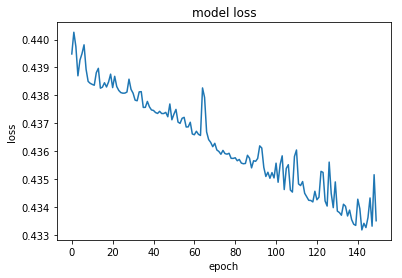

In [158]:
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [150]:
dnn_pred = model.predict(test)

In [151]:
h = pd.Series(list(dnn_pred))

In [152]:
df_test['Fees'] = dnn_pred

In [153]:
df_test[['Fees']].to_csv('pred6.csv', index=False)

## XG BOOST

In [206]:
import xgboost as xgb

In [248]:
xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [249]:
xgb1.fit(X,y)


[22:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [250]:
predictions = xgb1.predict(test)
predictions

array([268.49652, 338.94254, 388.1585 , ..., 278.0469 , 189.43097,
       359.53903], dtype=float32)

In [251]:
aa = pd.Series(list(predictions))
df_test[['Fees']] = aa


In [252]:
df_test[['Fees']].to_csv('pred7.csv', index=False)

Results obtained through XGBOOST yielded highest accuracy in comparision to ANN and Gradient Boosting. 
Accuracy : 72.99%